# Clustering Analysis

## Overview

This notebook is used to make a clustering analysis in order to understand, what cryptos are more related.
Before executing this notebook is necessarly to first launch `dataset_construction.py` script.  

## Requirements

### Conda env

To execute the following script a conda environment is necessary. It is possible to use the `crypto_anomalies.yaml` file in the `conda` fodler as:

```
cd conda
conda env create -f crypto_anomalies.yaml
conda activate crypto_anomalies
```

### Code execution

In order to be able to execute this notebook is necessary to first execute the `dataset_construction.py` script. Indeed, with that script all the .csv files for each crypto with the technical indicators will be saved in the right folder.  

In [38]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

Load the Data scaled, transformed with the technical indicators considered. 

In [29]:
# Set the input folder containing the transformed CSV files
input_folder = '../data/transformed'

# Get a list of all transformed CSV files
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

print(f'Found {len(csv_files)} CSV files in the input folder. The files are: {csv_files}')

Found 14 CSV files in the input folder. The files are: ['../data/transformed\\BTC_data_robust_scaled.csv', '../data/transformed\\BTS_data_robust_scaled.csv', '../data/transformed\\DASH_data_robust_scaled.csv', '../data/transformed\\DGB_data_robust_scaled.csv', '../data/transformed\\DOGE_data_robust_scaled.csv', '../data/transformed\\ETH_data_robust_scaled.csv', '../data/transformed\\LTC_data_robust_scaled.csv', '../data/transformed\\MAID_data_robust_scaled.csv', '../data/transformed\\MONA_data_robust_scaled.csv', '../data/transformed\\SYS_data_robust_scaled.csv', '../data/transformed\\VTC_data_robust_scaled.csv', '../data/transformed\\XLM_data_robust_scaled.csv', '../data/transformed\\XMR_data_robust_scaled.csv', '../data/transformed\\XRP_data_robust_scaled.csv']


In [30]:
# Initialize lists to store data
crypto_data_list = []
crypto_names = []

# Loop through each CSV file
for file_path in csv_files:
    # Extract the cryptocurrency name from the filename
    base_name = os.path.basename(file_path)
    crypto_name = base_name.split('_')[0]  # Adjust this if your filenames have a different format
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Add a column for the cryptocurrency name
    df['Crypto'] = crypto_name
    
    # Append to the list
    crypto_data_list.append(df)
    crypto_names.append(crypto_name)

print(f'Loaded data for {len(crypto_data_list)} cryptocurrencies: {crypto_names}')

Loaded data for 14 cryptocurrencies: ['BTC', 'BTS', 'DASH', 'DGB', 'DOGE', 'ETH', 'LTC', 'MAID', 'MONA', 'SYS', 'VTC', 'XLM', 'XMR', 'XRP']


In [31]:
# Concatenate all DataFrames
combined_df = pd.concat(crypto_data_list, ignore_index=True)

In [32]:
# Identify common features across all DataFrames
feature_columns = [col for col in combined_df.columns if col not in ['Crypto', 'Datetime', 'Date', 'Anomaly']]
common_features = set(feature_columns)
for df in crypto_data_list:
    common_features = common_features.intersection(set(df.columns))

common_features = list(common_features)

print(f'Common features across all cryptocurrencies: {common_features}')

Common features across all cryptocurrencies: ['RSI_20', 'SMA_100', 'EMA_26_pct_change', 'RSI_50_pct_change', 'SMA_26', 'RSI_20_pct_change', 'EMA_14', 'EMA_30', 'MOM', 'EMA_20', 'Close', 'EMA_5_pct_change', 'BBL_5_2.0', 'SMA_13_pct_change', 'CMO_13_pct_change', 'EMA_100_pct_change', 'RSI_50', 'Price_Variation_pct_change', 'RSI_13', 'EMA_100', 'High_pct_change', 'CMO_12_pct_change', 'CMO_200', 'SMA_5_pct_change', 'BBB_5_2.0', 'MACD_diff_pct_change', 'RSI_26_pct_change', 'UO', 'Price_Variation', 'Volume', 'SMA_200', 'CMO_13', 'SMA_30_pct_change', 'EMA_21_pct_change', 'CMO_5_pct_change', 'BBU_5_2.0_pct_change', 'RSI_100', 'BBP_5_2.0', 'EMA_13', 'CMO_50_pct_change', 'EMA_21', 'BBM_5_2.0', 'SMA_200_pct_change', 'CMO_20', 'BBP_5_2.0_pct_change', 'SMA_14_pct_change', 'MACD_pct_change', 'Adj Close', 'High', 'BBM_5_2.0_pct_change', 'SMA_26_pct_change', 'RSI_21_pct_change', 'SMA_50', 'MACD_signal', 'EMA_12_pct_change', 'CMO_5', 'Low', 'BBL_5_2.0_pct_change', 'EMA_5', 'SMA_13', 'Close_pct_change',

In [33]:
# Aggregate data for each cryptocurrency
aggregated_data = []

for crypto_name in set(crypto_names):
    # Filter data for the cryptocurrency
    crypto_df = combined_df[combined_df['Crypto'] == crypto_name]
    
    # Select common features
    crypto_features = crypto_df[common_features]
    
    # Aggregate features (e.g., compute the mean)
    aggregated_features = crypto_features.mean()
    
    # Create a DataFrame with the aggregated features
    aggregated_features_df = pd.DataFrame(aggregated_features).transpose()
    aggregated_features_df['Crypto'] = crypto_name
    
    # Append to the list
    aggregated_data.append(aggregated_features_df)

In [34]:
# Create the feature matrix
feature_matrix_df = pd.concat(aggregated_data, ignore_index=True)
feature_matrix_df.set_index('Crypto', inplace=True)
feature_matrix_df.head()

,RSI_20,SMA_100,EMA_26_pct_change,RSI_50_pct_change,SMA_26,RSI_20_pct_change,EMA_14,EMA_30,MOM,EMA_20,Close,EMA_5_pct_change,BBL_5_2.0,SMA_13_pct_change,CMO_13_pct_change,EMA_100_pct_change,RSI_50,Price_Variation_pct_change,RSI_13,EMA_100,High_pct_change,CMO_12_pct_change,CMO_200,SMA_5_pct_change,BBB_5_2.0,MACD_diff_pct_change,RSI_26_pct_change,UO,Price_Variation,Volume,SMA_200,CMO_13,SMA_30_pct_change,EMA_21_pct_change,CMO_5_pct_change,BBU_5_2.0_pct_change,RSI_100,BBP_5_2.0,EMA_13,CMO_50_pct_change,EMA_21,BBM_5_2.0,SMA_200_pct_change,CMO_20,BBP_5_2.0_pct_change,SMA_14_pct_change,MACD_pct_change,Adj Close,High,BBM_5_2.0_pct_change,SMA_26_pct_change,RSI_21_pct_change,SMA_50,MACD_signal,EMA_12_pct_change,CMO_5,Low,BBL_5_2.0_pct_change,EMA_5,SMA_13,Close_pct_change,CMO_21_pct_change,UO_pct_change,RSI_5,SMA_12_pct_change,MACD_signal_pct_change,Low_pct_change,SMA_12,EMA_13_pct_change,MACD_diff,SMA_50_pct_change,EMA_50,CMO_50,BBU_5_2.0,RSI_14,RSI_13_pct_change,CMO_14_pct_change,RSI_12,CMO_100,CMO_26_pct_change,CMO_100_pct_change,EMA_12,SMA_21_pct_change,CMO_30,RSI_5_pct_change,CMO_20_pct_change,CMO_200_pct_change,CMO_21,EMA_200_pct_change,RSI_12_pct_change,MACD,SMA_30,BBB_5_2.0_pct_change,RSI_30,Open_pct_change,EMA_30_pct_change,RSI_26,RSI_14_pct_change,RSI_200_pct_change,SMA_14,SMA_20_pct_change,EMA_14_pct_change,EMA_26,SMA_100_pct_change,Open,CMO_14,Adj Close_pct_change,RSI_30_pct_change,EMA_200,RSI_200,CMO_12,MOM_pct_change,RSI_21,SMA_5,RSI_100_pct_change,SMA_21,CMO_30_pct_change,CMO_26,EMA_20_pct_change,EMA_50_pct_change,SMA_20
Crypto,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BTS,0.010426,-0.050068,-0.008444,0.030311,-0.041408,0.054588,-0.039887,-0.043566,-0.025815,-0.039553,-0.041522,0.015017,-0.043907,-0.034411,-0.510298,0.012643,-0.002848,-0.379525,0.006892,-0.054602,0.005090,-1.037430,-0.012380,-0.012857,0.383100,1.331489,0.045437,-0.020383,-0.000179,1.465619,-0.047822,0.006892,-0.037770,-0.007453,0.116494,-0.020463,-0.010491,0.046471,-0.039934,9.598321,-0.039926,-0.041372,-0.009337,0.010426,2.774962,-0.035021,0.312255,-0.041522,-0.042901,-0.012857,-0.035636,0.052749,-0.044085,0.003340,0.006830,0.026977,-0.040658,-0.025691,-0.041610,-0.041136,-0.000179,-1.079145,0.092935,0.026977,-0.030512,-0.111976,-0.028698,-0.041266,0.004817,-0.027317,-0.035673,-0.048567,-0.002848,-0.039650,0.007391,0.078391,-2.164559,0.004129,-0.010491,-0.139130,0.813159,-0.040157,-0.034719,0.013052,0.221679,-0.783179,0.098869,0.012052,0.019955,0.084109,-0.032974,-0.041881,0.512756,0.013052,0.003481,-0.003834,0.012071,0.073382,0.019030,-0.041255,-0.037724,0.001008,-0.041256,-0.048137,-0.041336,0.007391,-0.000179,0.041004,-0.056435,-0.012380,0.004129,0.104262,0.012052,-0.041372,0.021790,-0.040514,-2.401490,0.012071,-0.005796,0.001530,-0.041082
BTC,0.006268,-0.202338,-0.009771,0.007414,-0.219359,0.031078,-0.225768,-0.217576,-0.011096,-0.223385,-0.234116,-0.014983,-0.213240,-0.004299,-0.285835,0.012119,0.027323,0.847597,-0.006865,-0.211648,0.051761,0.942733,0.056321,-0.007174,0.355999,-1.926612,0.022561,-0.006230,0.005099,0.883856,-0.191332,-0.006865,-0.001188,-0.010581,-0.261497,0.026656,0.040578,-0.031236,-0.227241,0.108805,-0.223657,-0.234780,0.056036,0.006268,1.010133,-0.006248,0.091349,-0.234116,-0.237323,-0.007174,0.000662,0.029313,-0.208321,0.018820,-0.016992,-0.016984,-0.224624,0.010289,-0.233991,-0.229005,0.005099,12.775892,0.039394,-0.016984,-0.003166,-0.028907,-0.040591,-0.227833,-0.012105,-0.010793,0.026114,-0.215300,0.027323,-0.235048,-0.002367,0.050965,-0.179874,-0.007215,0.040578,0.535212,-0.642526,-0.229149,0.004098,0.019603,0.170964,-0.160716,-0.233399,0.007617,0.031267,0.055914,-0.007671,-0.214337,0.322812,0.019603,0.003851,-0.007080,0.010115,0.046685,-0.006045,-0.227038,0.009791,-0.014808,-0.222256,0.053430,-0.232850,-0.002367,0.005099,0.018468,-0.230568,0.056321,-0.007215,1.380613,0.007617,-0.234780,-0.000683,-0.226764,3.235471,0.010115,-0.012389,0.001145,-0.2

In [35]:
# Prepare data for clustering
X = feature_matrix_df.values
crypto_names = feature_matrix_df.index.tolist()

## K-medoids

In [16]:
# Define clustering function
def k_medoids_clustering(X, k_values):
    silhouette_scores = []
    models = {}
    
    for k in k_values:
        print(f"Clustering with k = {k}")
        kmedoids = KMedoids(n_clusters=k, random_state=42)
        cluster_labels = kmedoids.fit_predict(X)
        if k > 1:
            silhouette_avg = silhouette_score(X, cluster_labels)
            silhouette_scores.append(silhouette_avg)
            print(f"Silhouette Score for k = {k}: {silhouette_avg}")
        else:
            silhouette_scores.append(np.nan)
            print("Silhouette Score cannot be computed for k = 1")
        models[k] = (kmedoids, cluster_labels)
    
    return silhouette_scores, models

Clustering with k = 2
Silhouette Score for k = 2: -0.27557739590869745
Clustering with k = 3
Silhouette Score for k = 3: -0.4781176895227378
Clustering with k = 4
Silhouette Score for k = 4: -0.3977301538604867
Clustering with k = 5
Silhouette Score for k = 5: -0.3338188268619384
Clustering with k = 6
Silhouette Score for k = 6: -0.3804371404232478
Clustering with k = 7
Silhouette Score for k = 7: -0.12534651912827077
Clustering with k = 8
Silhouette Score for k = 8: -0.17511544320386307
Clustering with k = 9
Silhouette Score for k = 9: -0.2508078193164862
Clustering with k = 10
Silhouette Score for k = 10: -0.2190468984219458


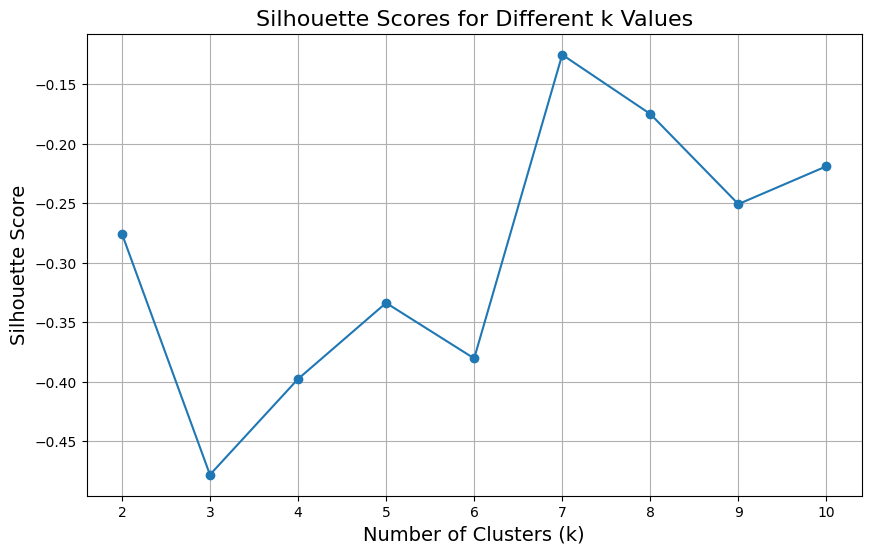

In [17]:
# Run clustering for different k values
k_values = range(2, min(11, len(crypto_names)))  # Up to number of cryptocurrencies
silhouette_scores, models = k_medoids_clustering(X, k_values)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [18]:
# Select the best k
valid_scores = [score for score in silhouette_scores if not np.isnan(score)]
best_k = k_values[np.argmax(valid_scores)]
print(f"Best k based on silhouette score: {best_k}")

# Get the best model and labels
best_model, best_labels = models[best_k]

# Create a DataFrame with cluster assignments
clusters_df = pd.DataFrame({
    'Crypto': crypto_names,
    'Cluster': best_labels
})

# Display the clusters
print("Cryptocurrencies grouped by clusters:")
for cluster in clusters_df['Cluster'].unique():
    cluster_group = clusters_df[clusters_df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_group['Crypto'].tolist())

Best k based on silhouette score: 7
Cryptocurrencies grouped by clusters:

Cluster 1:
['BTS', 'XMR']

Cluster 6:
['BTC', 'ETH', 'XLM']

Cluster 4:
['DGB', 'LTC']

Cluster 3:
['SYS']

Cluster 0:
['XRP', 'VTC', 'DASH']

Cluster 5:
['DOGE']

Cluster 2:
['MAID', 'MONA']


## DBSCAN

In [36]:
# Define DBSCAN clustering function
def dbscan_clustering(X, eps_values, min_samples_values):
    models = {}
    silhouette_scores = []
    params = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            print(f"\nClustering with eps = {eps}, min_samples = {min_samples}")
            # Initialize the DBSCAN model
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            
            # Fit the model
            cluster_labels = dbscan.fit_predict(X)
            
            # Number of clusters (excluding noise if present)
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            print(f"Estimated number of clusters: {n_clusters}")
            
            # Only compute silhouette score if there are at least 2 clusters
            if n_clusters > 1:
                silhouette_avg = silhouette_score(X, cluster_labels)
                silhouette_scores.append(silhouette_avg)
                print(f"Silhouette Score: {silhouette_avg:.4f}")
                models[(eps, min_samples)] = cluster_labels
                params.append((eps, min_samples))
            else:
                print("Cannot compute silhouette score with less than 2 clusters.")
    
    return models, silhouette_scores, params

# Define ranges for eps and min_samples
eps_values = np.linspace(0.1, 2.0, 20)  # Adjust based on your data
min_samples_values = range(2, 5)  # Adjust based on your data

# Run DBSCAN clustering for different eps and min_samples values
models, silhouette_scores, params = dbscan_clustering(X, eps_values, min_samples_values)



Clustering with eps = 0.1, min_samples = 2
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.1, min_samples = 3
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.1, min_samples = 4
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.2, min_samples = 2
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.2, min_samples = 3
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.2, min_samples = 4
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.3, min_samples = 2
Estimated number of clusters: 0
Cannot compute silhouette score with less than 2 clusters.

Clustering with eps = 0.3, min_samples = 3
Estimated n

In [37]:
# Check if any valid clustering was found
if silhouette_scores:
    # Find the parameters with the highest silhouette score
    best_index = np.argmax(silhouette_scores)
    best_params = params[best_index]
    best_labels = models[best_params]
    print(f"\nBest parameters based on silhouette score: eps = {best_params[0]}, min_samples = {best_params[1]}")
    print(f"Highest Silhouette Score: {silhouette_scores[best_index]:.4f}")
    
    # Create a DataFrame with cluster assignments
    clusters_df = pd.DataFrame({
        'Crypto': crypto_names,
        'Cluster': best_labels
    })
    
    # Display the clusters
    print("\nCryptocurrencies grouped by clusters:")
    for cluster in clusters_df['Cluster'].unique():
        cluster_group = clusters_df[clusters_df['Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(cluster_group['Crypto'].tolist())

## Hierarchical Clustering

In [39]:
def hierarchical_clustering(X, k_values, linkage_method='ward'):
    """
    Performs hierarchical clustering for a range of k values and computes silhouette scores.

    Parameters:
    - X (ndarray): Feature matrix for clustering.
    - k_values (list): List of k values (number of clusters) to try.
    - linkage_method (str): Linkage criterion to use ('ward', 'complete', 'average', 'single').

    Returns:
    - silhouette_scores (list): List of silhouette scores for each k.
    - models (dict): Dictionary of cluster labels for each k.
    """
    silhouette_scores = []
    models = {}

    for k in k_values:
        print(f"Clustering with k = {k}")

        # Initialize the AgglomerativeClustering model
        hierarchical = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)

        # Fit the model and predict cluster labels
        cluster_labels = hierarchical.fit_predict(X)

        # Calculate the silhouette score if k > 1
        if k > 1:
            silhouette_avg = silhouette_score(X, cluster_labels)
            silhouette_scores.append(silhouette_avg)
            print(f"Silhouette Score for k = {k}: {silhouette_avg:.4f}")
        else:
            silhouette_scores.append(np.nan)
            print("Silhouette Score cannot be computed for k = 1")

        # Store the cluster labels
        models[k] = cluster_labels

    return silhouette_scores, models

def plot_silhouette_scores(k_values, silhouette_scores):
    """
    Plots the silhouette scores for different k values.

    Parameters:
    - k_values (list): List of k values.
    - silhouette_scores (list): List of silhouette scores.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different k Values', fontsize=16)
    plt.xlabel('Number of Clusters (k)', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

def display_clusters(crypto_names, cluster_labels):
    """
    Displays the cryptocurrencies grouped by their cluster assignments.

    Parameters:
    - crypto_names (list): List of cryptocurrency names.
    - cluster_labels (list or ndarray): Cluster labels for each cryptocurrency.
    """
    # Create a DataFrame with cryptocurrencies and their cluster labels
    clusters_df = pd.DataFrame({
        'Crypto': crypto_names,
        'Cluster': cluster_labels
    })

    # Sort the DataFrame by cluster labels
    clusters_df.sort_values(by='Cluster', inplace=True)

    # Display the clusters
    print("\nCryptocurrencies grouped by clusters:")
    for cluster in clusters_df['Cluster'].unique():
        cluster_group = clusters_df[clusters_df['Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(", ".join(cluster_group['Crypto'].tolist()))


def plot_dendrogram(X, crypto_names, linkage_method='ward'):
    """
    Plots the dendrogram for hierarchical clustering.

    Parameters:
    - X (ndarray): Feature matrix.
    - crypto_names (list): List of cryptocurrency names.
    - linkage_method (str): Linkage criterion to use ('ward', 'complete', 'average', 'single').
    """
    # Compute the linkage matrix
    linked = linkage(X, method=linkage_method)

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linked, labels=crypto_names, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
    plt.xlabel('Cryptocurrencies', fontsize=14)
    plt.ylabel('Distance', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Clustering with k = 2
Silhouette Score for k = 2: 0.8998
Clustering with k = 3
Silhouette Score for k = 3: 0.6232
Clustering with k = 4
Silhouette Score for k = 4: 0.5168
Clustering with k = 5
Silhouette Score for k = 5: 0.2471
Clustering with k = 6
Silhouette Score for k = 6: 0.1552
Clustering with k = 7
Silhouette Score for k = 7: 0.1845


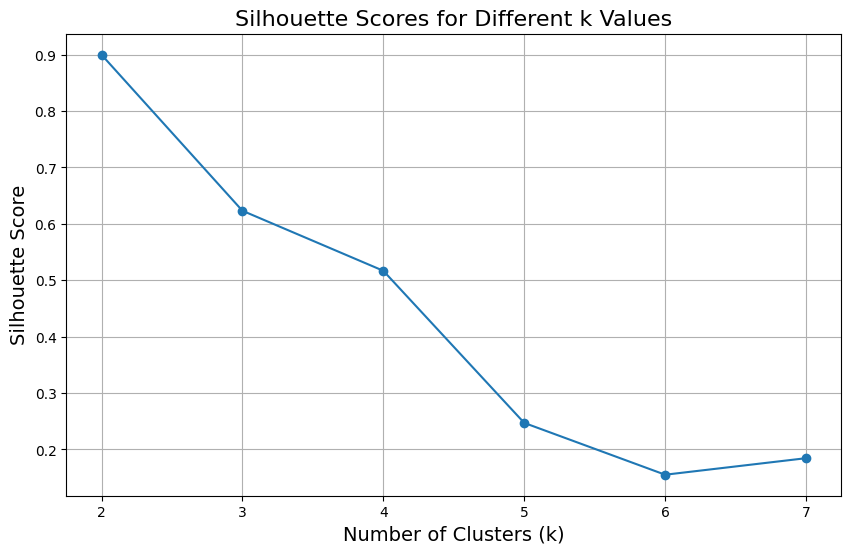


Best k based on silhouette score: 2

Cryptocurrencies grouped by clusters:

Cluster 0:
BTS, BTC, DGB, SYS, ETH, XLM, XMR, XRP, DOGE, VTC, DASH, MONA, LTC

Cluster 1:
MAID


In [41]:
max_k = 7
min_k = 2
linkage_method='ward'

# Step 5: Define the range of k values to try
max_possible_k = min(max_k, len(crypto_names))
k_values = range(min_k, max_possible_k + 1)

# Step 6: Perform hierarchical clustering
silhouette_scores, models = hierarchical_clustering(X, k_values, linkage_method=linkage_method)

# Step 7: Plot silhouette scores to evaluate k
plot_silhouette_scores(k_values, silhouette_scores)

# Step 8: Select the best k based on silhouette scores
valid_scores = [score for score in silhouette_scores if not np.isnan(score)]
best_k_index = np.argmax(valid_scores)
best_k = k_values[best_k_index]
print(f"\nBest k based on silhouette score: {best_k}")

# Step 9: Get the cluster labels for the best k
best_labels = models[best_k]

# Step 10: Display the clusters
display_clusters(crypto_names, best_labels)